20.0061


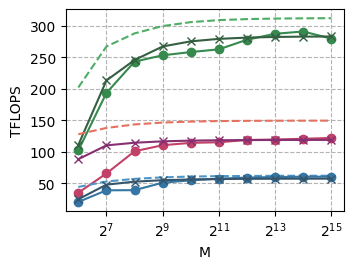

0.09006488477194714
0.2163241694781311


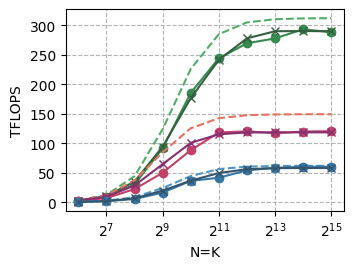

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

matmul_TPUv3 = pd.read_csv(
    "real_hardware/matmul_TPUv3.csv",
    header=None,
    names=["M", "N", "K", "latency", "overhead", "throughput"],
)
matmul_TPUv3["throughput"] = (
    matmul_TPUv3["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_TPUv3.set_index(["M", "N", "K"], inplace=True)
print(matmul_TPUv3.loc[(64, 12288, 12288), "throughput"])
matmul_TPUv3_sim = pd.read_csv(
    "matmul_TPUv3_sim.csv", header=None, names=["M", "N", "K", "latency", "throughput"]
)
matmul_TPUv3_sim["throughput"] = (
    matmul_TPUv3_sim["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_TPUv3_sim.set_index(["M", "N", "K"], inplace=True)
matmul_TPUv3_roofline = pd.read_csv(
    "matmul_TPUv3_roofline.csv",
    header=None,
    names=["M", "N", "K", "latency", "throughput"],
)
matmul_TPUv3_roofline["throughput"] = (
    matmul_TPUv3_roofline["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_TPUv3_roofline.set_index(["M", "N", "K"], inplace=True)
matmul_A100 = pd.read_csv(
    "real_hardware/matmul_A100.csv", header=None, names=["M", "N", "K", "latency", "throughput"]
)
matmul_A100["throughput"] = (
    matmul_A100["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_A100.set_index(["M", "N", "K"], inplace=True)
matmul_A100_sim = pd.read_csv(
    "matmul_A100_sim.csv", header=None, names=["M", "N", "K", "latency", "throughput"]
)
matmul_A100_sim["throughput"] = (
    matmul_A100_sim["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_A100_sim.set_index(["M", "N", "K"], inplace=True)
matmul_A100_roofline = pd.read_csv(
    "matmul_A100_roofline.csv",
    header=None,
    names=["M", "N", "K", "latency", "throughput"],
)
matmul_A100_roofline["throughput"] = (
    matmul_A100_roofline["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_A100_roofline.set_index(["M", "N", "K"], inplace=True)
matmul_MI210 = pd.read_csv(
    "real_hardware/matmul_MI210.csv", header=None, names=["M", "N", "K", "latency", "throughput"]
)
matmul_MI210["throughput"] = (
    matmul_MI210["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_MI210.set_index(["M", "N", "K"], inplace=True)
matmul_MI210_sim = pd.read_csv(
    "matmul_MI210_sim.csv", header=None, names=["M", "N", "K", "latency", "throughput"]
)
matmul_MI210_sim["throughput"] = (
    matmul_MI210_sim["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_MI210_sim.set_index(["M", "N", "K"], inplace=True)
matmul_MI210_roofline = pd.read_csv(
    "matmul_MI210_roofline.csv",
    header=None,
    names=["M", "N", "K", "latency", "throughput"],
)
matmul_MI210_roofline["throughput"] = (
    matmul_MI210_roofline["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_MI210_roofline.set_index(["M", "N", "K"], inplace=True)

color_NV = sns.color_palette("Greens_d", 4)[1:]
color_Google = sns.color_palette("Blues_d", 4)[1:]
color_AMD = sns.color_palette("flare", 3)

K = 12288
N = K
title = f"Performance of Matmul with K={K}, N={N}"
M_list = []
throughput_TPU_list = []
throughput_TPU_sim_list = []
throughput_TPU_roofline_list = []
throughput_GPU_list = []
throughput_GPU_sim_list = []
throughput_GPU_roofline_list = []
throughput_AMD_list = []
throughput_AMD_sim_list = []
throughput_AMD_roofline_list = []
for M in range(6, 16):
    M = 2**M
    M_list.append(M)
    throughput_TPU_list.append(matmul_TPUv3.loc[(M, N, K), "throughput"])
    throughput_TPU_sim_list.append(matmul_TPUv3_sim.loc[(M, N, K), "throughput"])
    throughput_TPU_roofline_list.append(
        matmul_TPUv3_roofline.loc[(M, N, K), "throughput"]
    )
    throughput_GPU_list.append(matmul_A100.loc[(M, N, K), "throughput"])
    throughput_GPU_sim_list.append(matmul_A100_sim.loc[(M, N, K), "throughput"])
    throughput_GPU_roofline_list.append(
        matmul_A100_roofline.loc[(M, N, K), "throughput"]
    )
    throughput_AMD_list.append(matmul_MI210.loc[(M, N, K), "throughput"])
    throughput_AMD_sim_list.append(matmul_MI210_sim.loc[(M, N, K), "throughput"])
    throughput_AMD_roofline_list.append(
        matmul_MI210_roofline.loc[(M, N, K), "throughput"]
    )

avg_error_rate_0 = np.concatenate(
    [
        np.abs(np.array(throughput_TPU_list) / np.array(throughput_TPU_sim_list) - 1),
        np.abs(np.array(throughput_GPU_list) / np.array(throughput_GPU_sim_list) - 1),
        np.abs(np.array(throughput_AMD_list) / np.array(throughput_AMD_sim_list) - 1),
    ]
)
roofline_avg_error_rate_0 = np.concatenate(
    [
        np.abs(
            np.array(throughput_TPU_list) / np.array(throughput_TPU_roofline_list) - 1
        ),
        np.abs(
            np.array(throughput_GPU_list) / np.array(throughput_GPU_roofline_list) - 1
        ),
        np.abs(
            np.array(throughput_AMD_list) / np.array(throughput_AMD_roofline_list) - 1
        ),
    ]
)
# plt.figure(figsize=(6, 2.8))
plt.figure(figsize=(3.64, 2.8))
plt.xscale("log", base=2)
plt.plot(
    M_list,
    throughput_GPU_roofline_list,
    marker=" ",
    linewidth=1.5,
    linestyle="--",
    label="Roofline of NVIDIA A100",
    color=color_NV[0],
)
plt.plot(
    M_list, throughput_GPU_list, marker="o", label="Real NVIDIA A100", color=color_NV[1]
)
plt.plot(
    M_list,
    throughput_GPU_sim_list,
    marker="x",
    label="Simulated NVIDIA A100",
    color=color_NV[2],
)
plt.plot(
    M_list,
    throughput_AMD_roofline_list,
    marker=" ",
    linewidth=1.5,
    linestyle="--",
    label="Roofline of AMD MI210",
    color=color_AMD[0],
)
plt.plot(
    M_list, throughput_AMD_list, marker="o", label="Real AMD MI210", color=color_AMD[1]
)
plt.plot(
    M_list,
    throughput_AMD_sim_list,
    marker="x",
    label="Simulated AMD MI210",
    color=color_AMD[2],
)
plt.plot(
    M_list,
    throughput_TPU_roofline_list,
    marker=" ",
    linewidth=1.5,
    linestyle="--",
    label="Roofline of Google TPUv3",
    color=color_Google[0],
)
plt.plot(
    M_list,
    throughput_TPU_list,
    marker="o",
    label="Real Google TPUv3",
    color=color_Google[1],
)
plt.plot(
    M_list,
    throughput_TPU_sim_list,
    marker="x",
    label="Simulated Google TPUv3",
    color=color_Google[2],
)


# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1))
# plt.title(title)
plt.xlabel("M")
plt.ylabel("TFLOPS")
plt.grid(True, which="both", ls="--", c="0.7")  # Adding a grid for better readability
plt.tight_layout()
plt.savefig("matmul_M.pdf", bbox_inches="tight", pad_inches=0.01, dpi=300)
plt.show()

M = 8192
title = f"Performance of Matmul with M={M}"
K_list = []
throughput_TPU_list = []
throughput_TPU_sim_list = []
throughput_TPU_roofline_list = []
throughput_GPU_list = []
throughput_GPU_sim_list = []
throughput_GPU_roofline_list = []
throughput_AMD_list = []
throughput_AMD_sim_list = []
throughput_AMD_roofline_list = []
for K in range(6, 16):
    K = 2**K
    N = K
    K_list.append(K)
    throughput_TPU_list.append(matmul_TPUv3.loc[(M, N, K), "throughput"])
    throughput_TPU_sim_list.append(matmul_TPUv3_sim.loc[(M, N, K), "throughput"])
    throughput_TPU_roofline_list.append(
        matmul_TPUv3_roofline.loc[(M, N, K), "throughput"]
    )
    throughput_GPU_list.append(matmul_A100.loc[(M, N, K), "throughput"])
    throughput_GPU_sim_list.append(matmul_A100_sim.loc[(M, N, K), "throughput"])
    throughput_GPU_roofline_list.append(
        matmul_A100_roofline.loc[(M, N, K), "throughput"]
    )
    throughput_AMD_list.append(matmul_MI210.loc[(M, N, K), "throughput"])
    throughput_AMD_sim_list.append(matmul_MI210_sim.loc[(M, N, K), "throughput"])
    throughput_AMD_roofline_list.append(
        matmul_MI210_roofline.loc[(M, N, K), "throughput"]
    )

avg_error_rate = np.concatenate(
    [
        avg_error_rate_0,
        np.abs(np.array(throughput_TPU_list) / np.array(throughput_TPU_sim_list) - 1),
        np.abs(np.array(throughput_GPU_list) / np.array(throughput_GPU_sim_list) - 1),
        np.abs(np.array(throughput_AMD_list) / np.array(throughput_AMD_sim_list) - 1),
    ]
).mean()
print(avg_error_rate)
rooflien_avg_error_rate = np.concatenate(
    [
        roofline_avg_error_rate_0,
        np.abs(
            np.array(throughput_TPU_list) / np.array(throughput_TPU_roofline_list) - 1
        ),
        np.abs(
            np.array(throughput_GPU_list) / np.array(throughput_GPU_roofline_list) - 1
        ),
        np.abs(
            np.array(throughput_AMD_list) / np.array(throughput_AMD_roofline_list) - 1
        ),
    ]
).mean()
print(rooflien_avg_error_rate)
plt.figure(figsize=(3.64, 2.8))
plt.xscale("log", base=2)
plt.plot(
    K_list,
    throughput_GPU_roofline_list,
    marker=" ",
    linewidth=1.5,
    linestyle="--",
    label="Roofline of NVIDIA A100",
    color=color_NV[0],
)
plt.plot(
    K_list, throughput_GPU_list, marker="o", label="Real NVIDIA A100", color=color_NV[1]
)
plt.plot(
    K_list,
    throughput_GPU_sim_list,
    marker="x",
    label="Simulated NVIDIA A100",
    color=color_NV[2],
)
plt.plot(
    K_list,
    throughput_AMD_roofline_list,
    marker=" ",
    linewidth=1.5,
    linestyle="--",
    label="Roofline of AMD MI210",
    color=color_AMD[0],
)
plt.plot(
    K_list, throughput_AMD_list, marker="o", label="Real AMD MI210", color=color_AMD[1]
)
plt.plot(
    K_list,
    throughput_AMD_sim_list,
    marker="x",
    label="Simulated AMD MI210",
    color=color_AMD[2],
)
plt.plot(
    K_list,
    throughput_TPU_roofline_list,
    marker=" ",
    linewidth=1.5,
    linestyle="--",
    label="Roofline of Google TPUv3",
    color=color_Google[0],
)
plt.plot(
    K_list,
    throughput_TPU_list,
    marker="o",
    label="Real Google TPUv3",
    color=color_Google[1],
)
plt.plot(
    K_list,
    throughput_TPU_sim_list,
    marker="x",
    label="Simulated Google TPUv3",
    color=color_Google[2],
)
# plt.legend()
# plt.title(title)
plt.xlabel("N=K")
plt.ylabel("TFLOPS")
plt.grid(True, which="both", ls="--", c="0.7")  # Adding a grid for better readability
plt.tight_layout()
plt.savefig("matmul_NK.pdf", bbox_inches="tight", pad_inches=0.01, dpi=300)
plt.show()